In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
# loading the data
car = pd.read_csv('/content/car data.csv')

In [5]:
#print first 5 entries of the dataset
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# checking the number of rows and columns
car.shape

(301, 9)

In [ ]:
# print information about the dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#checking if the data contain missing value
car.isnull().values.any()

False

In [ ]:
# checking the number of missing values
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


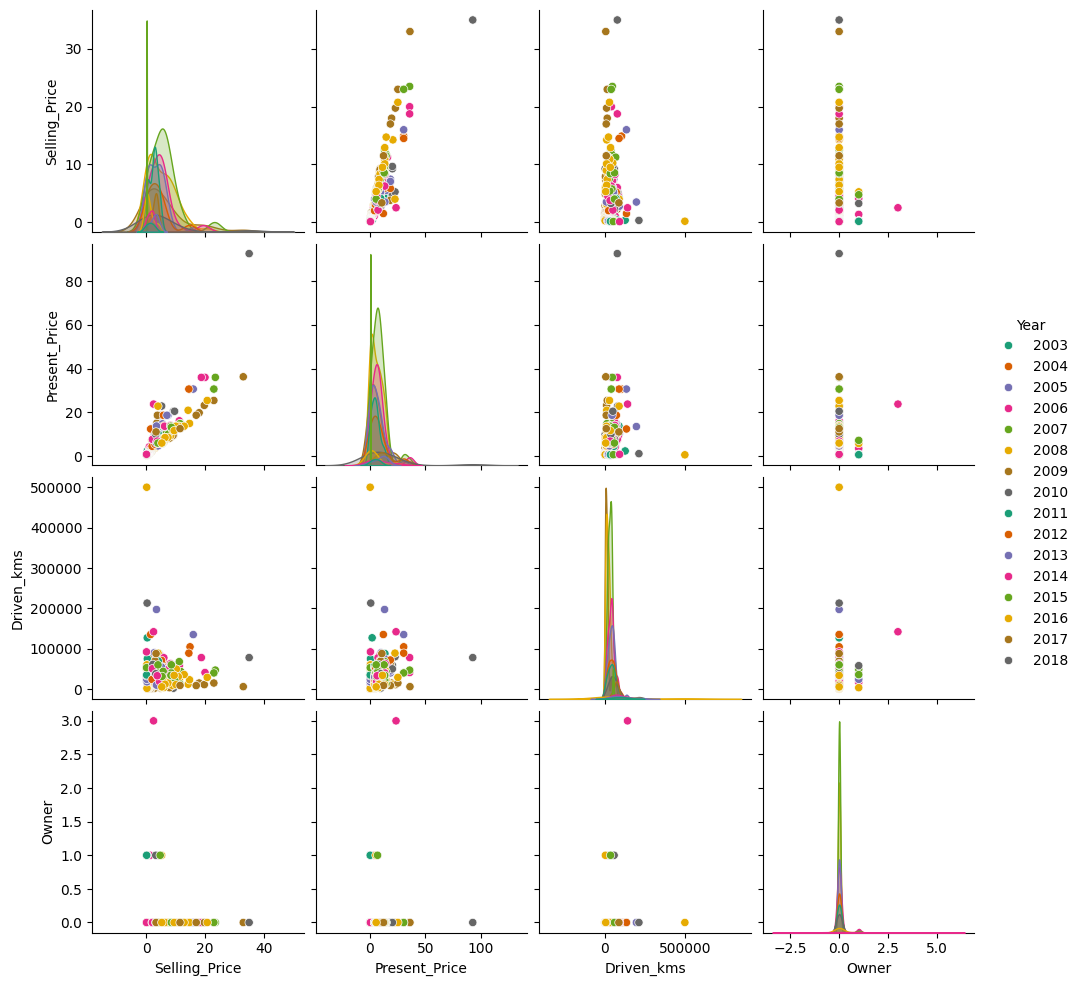

In [ ]:
sns.pairplot(car,hue='Year',palette='Dark2')

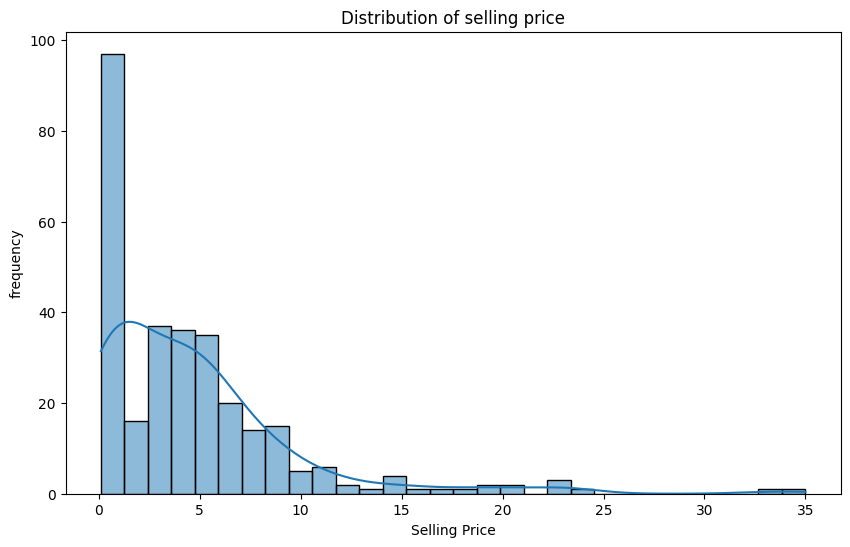

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(car['Selling_Price'],bins=30,kde=True)
plt.title('Distribution of selling price')
plt.xlabel('Selling Price')
plt.ylabel('frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

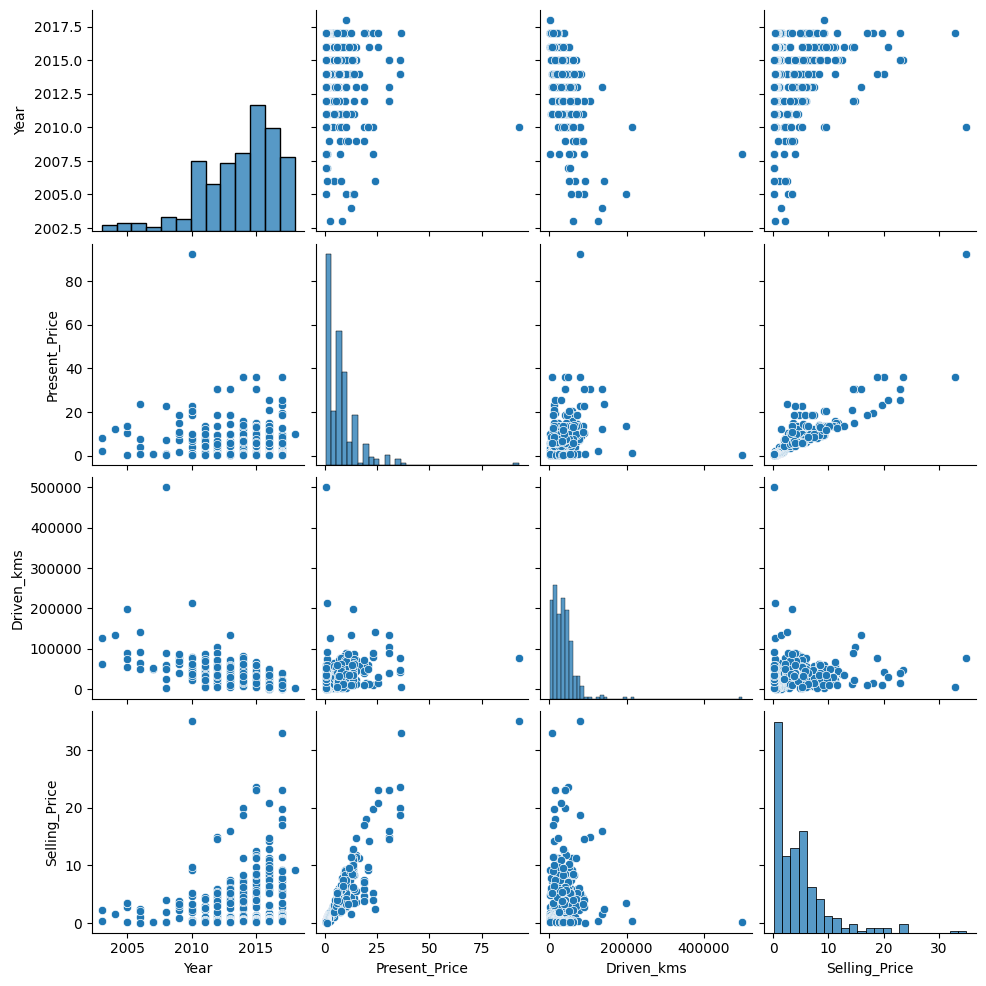

In [ ]:
sns.pairplot(car,vars=['Year','Present_Price','Driven_kms','Selling_Price'],palette='Dark2')

In [6]:
# encoding "Fuel_Type" Column
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [7]:
car.head(300)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
295,city,2015,8.55,13.09,60076,1,0,0,0
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0


splitting the data and target

In [8]:
X = car.drop(['Car_Name','Selling_Price'],axis=1)
Y = car['Selling_Price']

In [9]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [10]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [17]:
#splitting the training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [18]:
print(X_train)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
184  2008          0.750       26000          0             1             0   
132  2017          0.950        3500          0             1             0   
194  2008          0.787       50000          0             1             0   
75   2015          6.800       36000          0             0             0   
111  2016          1.500        8700          0             1             0   
..    ...            ...         ...        ...           ...           ...   
188  2013          0.570       18000          0             1             0   
71   2011         12.480       45000          1             0             0   
106  2014          3.450       16500          0             1             0   
270  2011         10.000       69341          0             0             0   
102  2017          1.780        4000          0             1             0   

     Owner  
184      1  
132      0  
194      0  

In [19]:
print(X_test)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
177  2016           0.57       24000          0             1             1   
289  2016          13.60       10980          0             0             0   
228  2012           9.40       60000          1             0             0   
198  2011           0.57       35000          0             1             0   
60   2013          18.61       40001          0             0             0   
..    ...            ...         ...        ...           ...           ...   
234  2015           5.70        4492          0             0             0   
296  2016          11.60       33988          1             0             0   
281  2006           7.60       50456          0             0             0   
285  2016           8.50       15059          0             0             1   
182  2013           0.58       30000          0             1             0   

     Owner  
177      0  
289      0  
228      0  

Model Training

In [20]:
# loading the linear regression model
lin_reg= LinearRegression()

In [21]:
lin_reg.fit(X_train,Y_train)


LinearRegression()

Model Evaluation

In [22]:
# prediction on Training data
training_data_prediction = lin_reg.predict(X_train)

In [23]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8836563703329274


In [ ]:
# prediction on Testing data
test_data_prediction = lin_reg.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8466902419662656


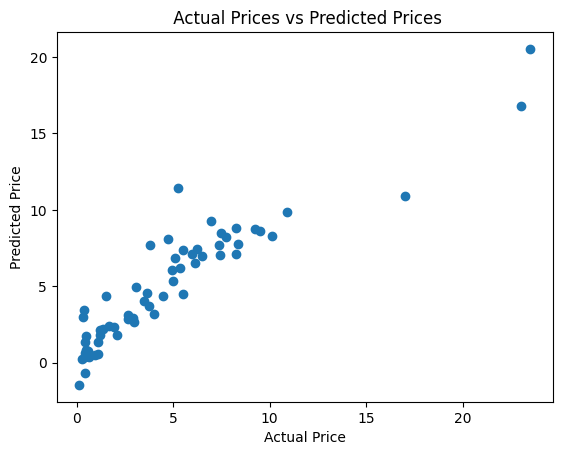

In [ ]:
#visualize the prediction
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()